In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

LOGS_PATH = "../logs/"

In [74]:
exps = [d for d in os.listdir(LOGS_PATH) if os.path.isdir(os.path.join(LOGS_PATH, d))]
exps.sort()
metrics = [pd.read_csv(os.path.join(LOGS_PATH, exp, "metrics.csv")) for exp in exps]
all_test = pd.read_csv(os.path.join(LOGS_PATH,  "all_test_summary.csv"))


exp_labels = {
    "timesteps": [int(exp.split("_")[1][1:]) for exp in exps],
    "epochs":    [int(exp.split("_")[2][1:]) for exp in exps]
}
# Reorder experiments by desired epoch order
desired_order = [5, 10, 25, 50]
order_idx = sorted(
    range(len(exps)),
    key=lambda i: desired_order.index(exp_labels["epochs"][i])
)
exps     = [exps[i] for i in order_idx]
metrics  = [metrics[i] for i in order_idx]
exp_labels["epochs"]    = [exp_labels["epochs"][i] for i in order_idx]
exp_labels["timesteps"] = [exp_labels["timesteps"][i] for i in order_idx]


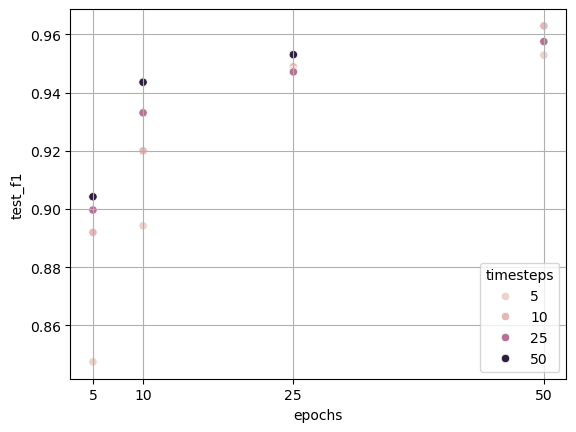

In [75]:
f=sns.scatterplot(data=all_test, x="epochs", y="test_f1", hue="timesteps")
f.grid()
f.set_xticks([5,10,25,50])

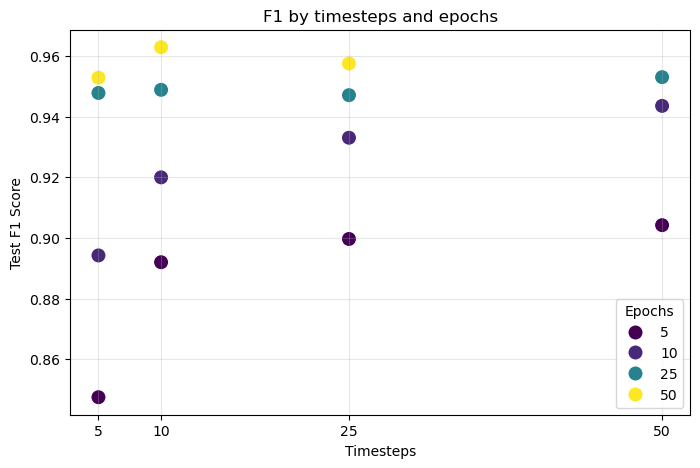

In [111]:
all_test["timesteps"] = all_test["timesteps"].astype(int)
all_test["epochs"] = all_test["epochs"].astype(int)

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=all_test,
    x="timesteps",
    y="test_f1",
    hue="epochs",
    palette="viridis",
    s=120
)
plt.grid(True, alpha=0.3)
plt.title("F1 by timesteps and epochs")
plt.xticks([5,10,25,50])
plt.ylabel("Test F1 Score")
plt.xlabel("Timesteps")
plt.legend(title="Epochs", loc="lower right")
plt.show()

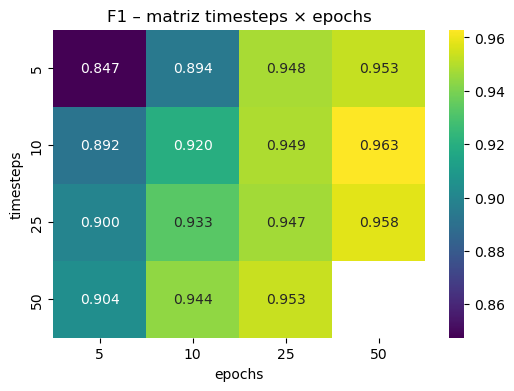

In [77]:
pivot = all_test.pivot(index="timesteps", columns="epochs", values="test_f1")

plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, fmt=".3f", cmap="viridis")
plt.title("F1 – matriz timesteps × epochs")
plt.show()


In [78]:
print(exps)

['exp_T10_E5_20260116_193423', 'exp_T25_E5_20260116_194046', 'exp_T50_E5_20260116_195624', 'exp_T5_E5_20260116_193102', 'exp_T10_E10_20260119_121125', 'exp_T25_E10_20260116_202736', 'exp_T50_E10_20260119_122425', 'exp_T5_E10_20260119_120427', 'exp_T10_E25_20260119_133937', 'exp_T25_E25_20260116_205905', 'exp_T50_E25_20260120_190556', 'exp_T5_E25_20260120_181143', 'exp_T10_E50_20260119_141222', 'exp_T25_E50_20260116_221758', 'exp_T50_E50_20260120_220207', 'exp_T5_E50_20260120_182815']


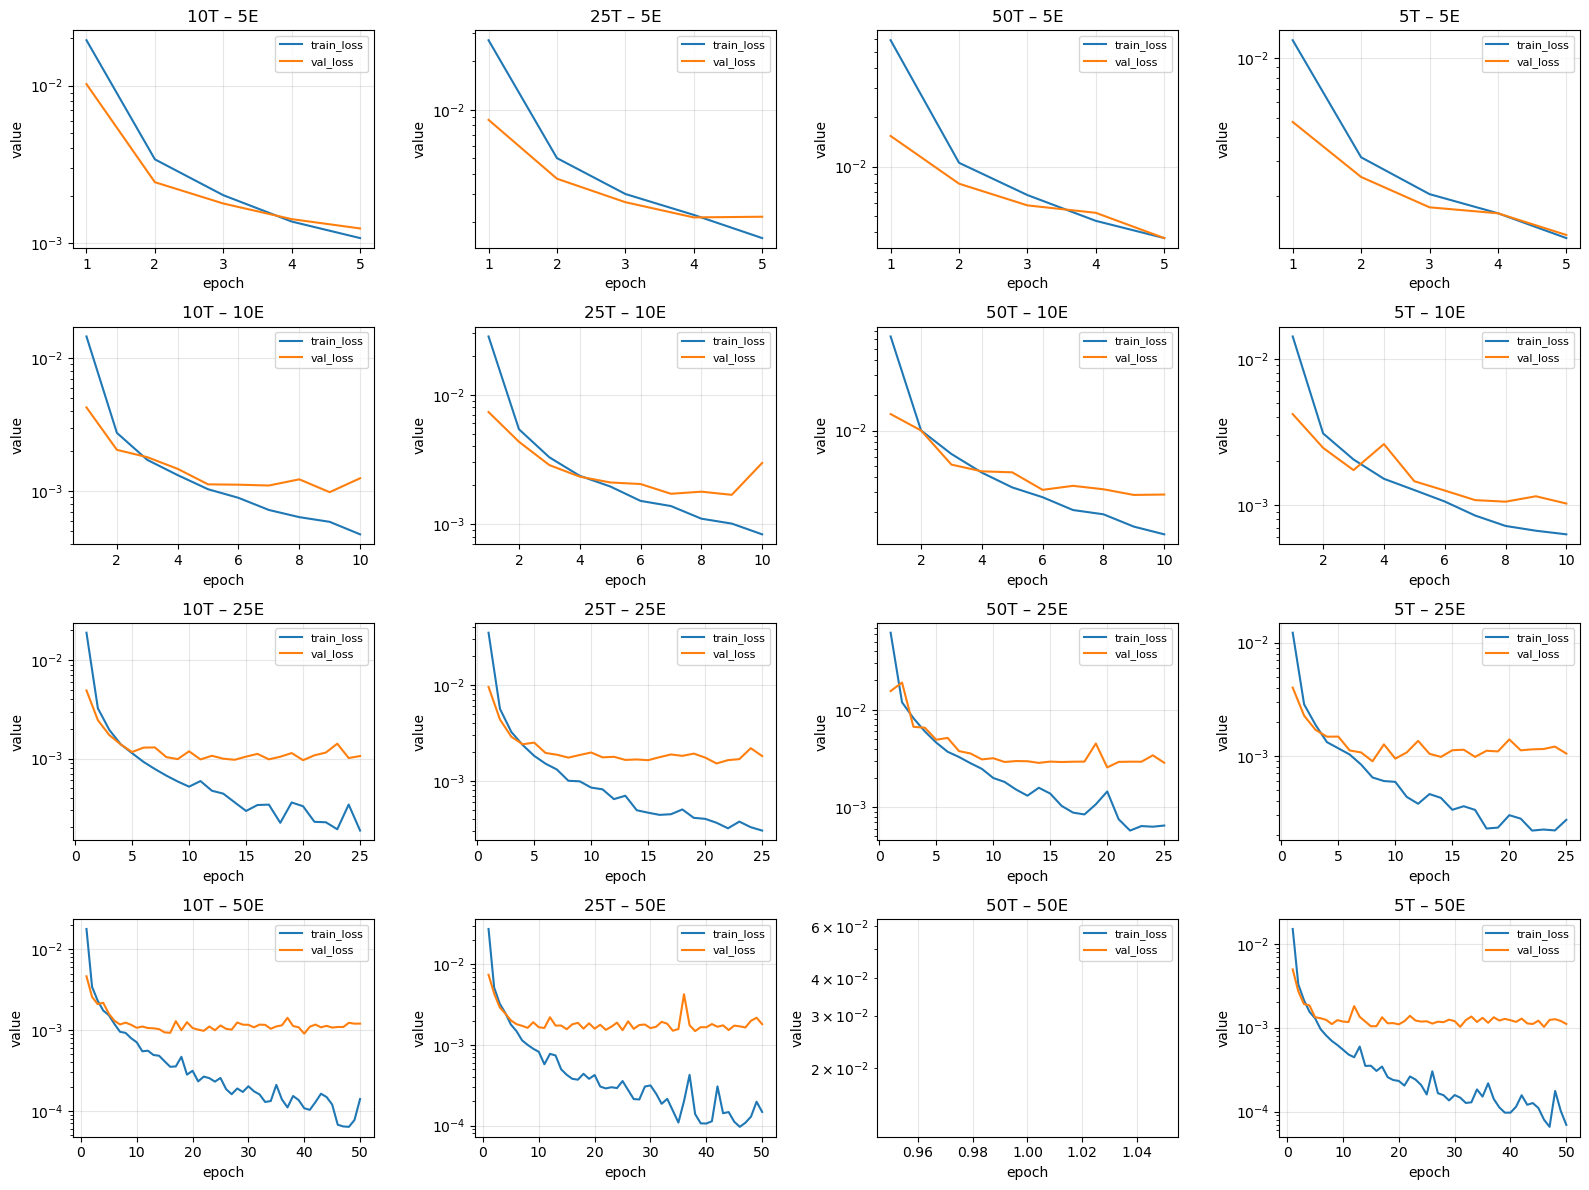

In [79]:
import math

num_exp = len(exps)
cols = 4
rows = math.ceil(num_exp / cols)

fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3*rows), sharey=False)
axes = axes.flatten()

for i, df in enumerate((metrics)):

    ax = axes[i]

    ax.plot(df["epoch"], df["train_loss"], label="train_loss")
    ax.plot(df["epoch"], df["val_loss"], label="val_loss")
    # ax.plot(df["epoch"], df["val_f1"], label="val_f1")

    ax.set_title(f"{exp_labels['timesteps'][i]}T – {exp_labels['epochs'][i]}E")
    ax.set_xlabel("epoch")
    ax.set_ylabel("value")
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=8)
    ax.set_yscale("log")

plt.tight_layout()
plt.show()


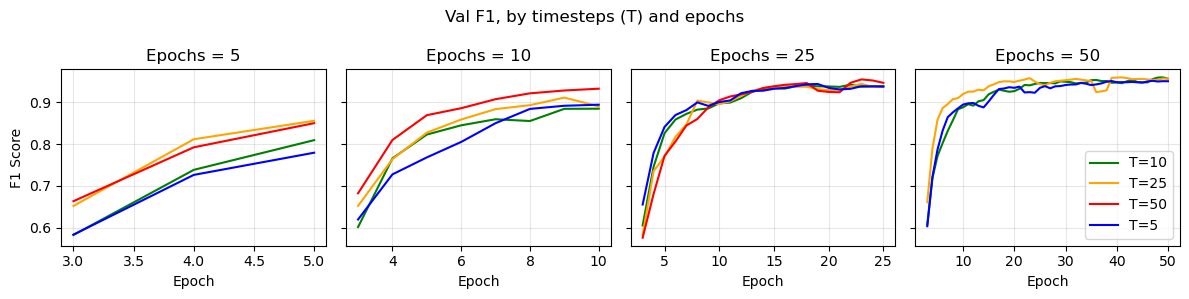

In [109]:
desired_order = [5, 10, 25, 50]
color_map = {5: "blue", 10: "green", 25: "orange", 50: "red"}
fig, axes = plt.subplots(1, len(desired_order), figsize=(12,3), sharey=True)

for df, T, E in zip(metrics, exp_labels["timesteps"], exp_labels["epochs"]):
    idx = desired_order.index(E)
    ax = axes[idx]
    ax.plot(df["epoch"], df["val_f1"].rolling(window=3).mean(), label=f"T={T}", c=color_map[T])
    ax.set_title(f"Epochs = {E}")
    ax.grid(True, alpha=0.3)

for ax in axes:  
    ax.set_xlabel("Epoch")
axes[-1].legend(loc="lower right")
axes[0].set_ylabel("F1 Score")
fig.suptitle("Val F1, by timesteps (T) and epochs")
plt.tight_layout()
plt.show()


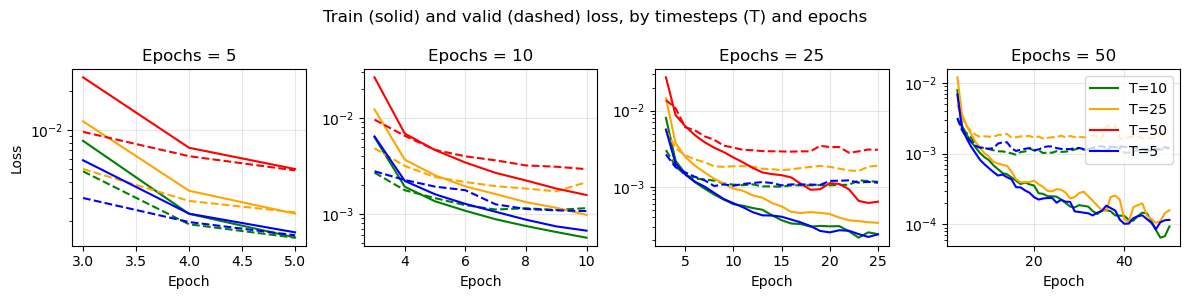

In [ ]:

fig, axes = plt.subplots(1, len(desired_order), figsize=(12,3))

for df, T, E in zip(metrics, exp_labels["timesteps"], exp_labels["epochs"]):
    idx = desired_order.index(E)
    ax = axes[idx]
    ax.plot(df["epoch"], df["train_loss"].rolling(window=3).mean(), label=f"T={T}", c=color_map[T])
    ax.plot(df["epoch"], df["val_loss"].rolling(window=3).mean(), linestyle="--", c=color_map[T])

    ax.set_title(f"Epochs = {E}")
    ax.grid(True, alpha=0.3)

for ax in axes: 
    ax.set_yscale("log")
    ax.set_xlabel("Epoch")
axes[-1].legend(loc="upper right")
axes[0].set_ylabel("Loss")

fig.suptitle("Train (solid) and valid (dashed) loss, by timesteps (T) and epochs")
plt.tight_layout()
plt.show()


In [81]:
summary = []

for exp, df, T, E in zip(exps, metrics, exp_labels["timesteps"], exp_labels["epochs"]):
    
    last = df.iloc[-1]  # última fila

    item = {
        "experiment": exp,
        "timesteps": T,
        "epochs": E,
        "final_train_loss": last.get("train_loss", np.nan),
        "final_val_loss": last.get("val_loss", np.nan),
        "final_val_f1": last.get("val_f1", np.nan), 
    }

    summary.append(item)

summary_df = pd.DataFrame(summary)
display(summary_df)

summary_df.to_csv(os.path.join(LOGS_PATH, "last_metrics.csv"), index=False)

,experiment,timesteps,epochs,final_train_loss,final_val_loss,final_val_f1
0,exp_T10_E5_20260116_193423,10,5,0.001081,0.001244,0.892485
1,exp_T25_E5_20260116_194046,25,5,0.001599,0.002169,0.896852
2,exp_T50_E5_20260116_195624,50,5,0.003666,0.003665,0.895463
3,exp_T5_E5_20260116_193102,5,5,0.001222,0.001268,0.835280
4,exp_T10_E10_20260119_121125,10,10,0.000474,0.001251,0.890485
5,exp_T25_E10_20260116_202736,25,10,0.000833,0.002972,0.841057
6,exp_T50_E10_20260119_122425,50,10,0.001301,0.002842,0.938227
7,exp_T5_E10_20260119_120427,5,10,0.000630,0.001023,0.884165
8,exp_T10_E25_20260119_133937,10,25,0.000186,0.001062,0.942899
9,exp_T25_E25_20260116_205905,25,25,0.000305,0.001816,0.942087


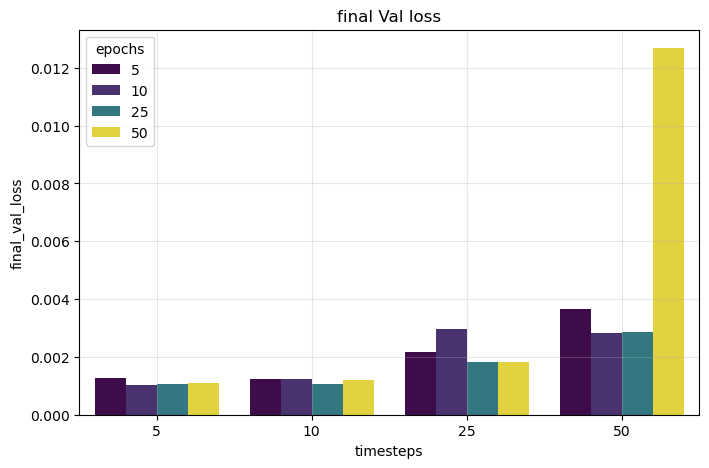

In [82]:
plt.figure(figsize=(8,5))
sns.barplot(data=summary_df, x="timesteps", y="final_val_loss", hue="epochs", palette="viridis")
plt.title("final Val loss")
plt.grid(True, alpha=0.3)
plt.show()


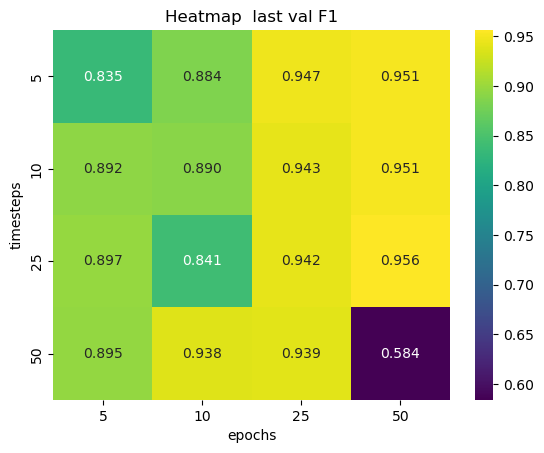

In [83]:
pivot_f1 = summary_df.pivot(index="timesteps", columns="epochs", values="final_val_f1")
sns.heatmap(pivot_f1, annot=True, fmt=".3f", cmap="viridis")
plt.title("Heatmap  last val F1")
plt.show()


In [114]:
summary_best = []

for exp, df, T, E in zip(exps, metrics, exp_labels["timesteps"], exp_labels["epochs"]):
     
    best_val_f1 = df.loc[df["val_f1"].idxmax()] 
    best_val_loss = df.loc[df["val_loss"].idxmin()]


    item = {
        "experiment": exp,
        "timesteps": T,
        "epochs": E,
        "best_val_loss": best_val_loss["val_loss"],
        "best_val_loss_epoch": int(best_val_loss["epoch"]),
        "best_val_f1": best_val_f1["val_f1"],
        "best_val_f1_epoch": int(best_val_f1["epoch"]),
        "avg_epoch_time": df["epoch_time"].mean()
    }   

    summary_best.append(item)

summary_best = pd.DataFrame(summary_best)
display(summary_best)

summary_best.to_csv(os.path.join(LOGS_PATH, "best_metrics.csv"), index=False)

,experiment,timesteps,epochs,best_val_loss,best_val_loss_epoch,best_val_f1,best_val_f1_epoch,avg_epoch_time
0,exp_T10_E5_20260116_193423,10,5,0.001244,5,0.892485,5,65.636793
1,exp_T25_E5_20260116_194046,25,5,0.002148,4,0.896852,5,161.836639
2,exp_T50_E5_20260116_195624,50,5,0.003665,5,0.895463,5,323.611248
3,exp_T5_E5_20260116_193102,5,5,0.001268,5,0.835280,5,33.998330
4,exp_T10_E10_20260119_121125,10,10,0.000983,9,0.921941,9,65.544302
5,exp_T25_E10_20260116_202736,25,10,0.001684,9,0.930700,9,162.875754
6,exp_T50_E10_20260119_122425,50,10,0.002820,9,0.938227,10,321.110518
7,exp_T5_E10_20260119_120427,5,10,0.001023,10,0.911519,8,33.572382
8,exp_T10_E25_20260119_133937,10,25,0.000964,20,0.947245,17,65.903357
9,exp_T25_E25_20260116_205905,25,25,0.001521,21,0.945444,23,163.322631


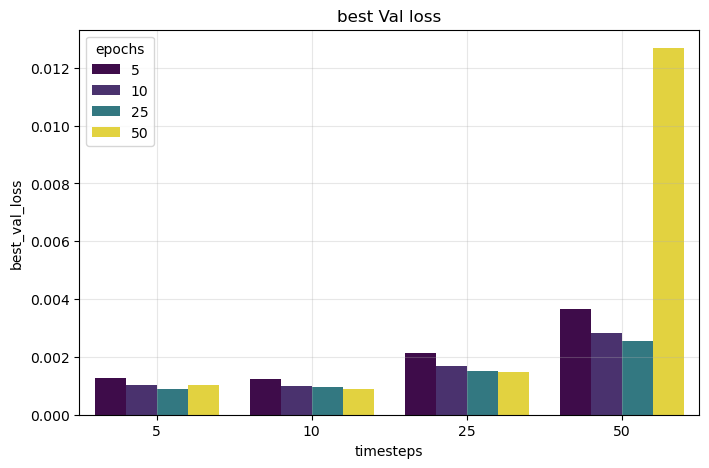

In [85]:
plt.figure(figsize=(8,5))
sns.barplot(data=summary_best, x="timesteps", y="best_val_loss", hue="epochs", palette="viridis")
plt.title("best Val loss")
plt.grid(True, alpha=0.3)
plt.show()


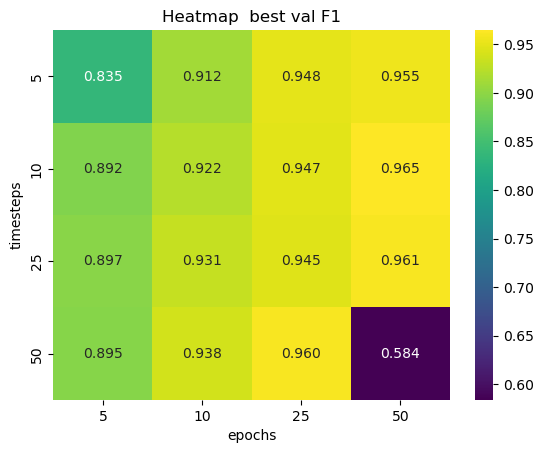

In [86]:
pivot_f1 = summary_best.pivot(index="timesteps", columns="epochs", values="best_val_f1")
sns.heatmap(pivot_f1, annot=True, fmt=".3f", cmap="viridis")
plt.title("Heatmap  best val F1")
plt.show()


In [113]:
metrics

[   epoch  epoch_time  train_loss  val_loss    val_f1
 0      1   65.782023    0.019368  0.010211  0.318788
 1      2   65.970862    0.003408  0.002441  0.679130
 2      3   65.281847    0.002020  0.001789  0.749179
 3      4   65.619938    0.001375  0.001425  0.786496
 4      5   65.529295    0.001081  0.001244  0.892485,
    epoch  epoch_time  train_loss  val_loss    val_f1
 0      1  161.779080    0.027002  0.008655  0.389449
 1      2  162.147406    0.005011  0.003733  0.764170
 2      3  162.149852    0.003002  0.002670  0.802036
 3      4  161.703412    0.002227  0.002148  0.868457
 4      5  161.403443    0.001599  0.002169  0.896852,
    epoch  epoch_time  train_loss  val_loss    val_f1
 0      1  323.674943    0.059084  0.015388  0.449196
 1      2  323.715952    0.010553  0.007869  0.722097
 2      3  321.417652    0.006708  0.005802  0.818461
 3      4  324.065405    0.004668  0.005226  0.836278
 4      5  325.182289    0.003666  0.003665  0.895463,
    epoch  epoch_time  tr

In [116]:
summary_best["avg_epoch_time"] /= 60  # convertir a minutos

In [119]:
summary_best.groupby("timesteps")["avg_epoch_time"].mean()

timesteps
5     0.561368
10    1.096637
25    2.715609
50    5.396922
Name: avg_epoch_time, dtype: float64